In [53]:
# importing nacessary libraries
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [54]:
# reading the .pkl file which containes the list of features required
df = pd.read_pickle("merged_all_table.csv.pkl", compression='bz2')

In [55]:
# checking the shape of the data
df.shape

(25979, 115)

In [56]:
# checking for null values
df.isna().sum()

season                  0
stage                   0
date                    0
match_api_id            0
home_team_api_id        0
away_team_api_id        0
home_player_X1       1821
home_player_X2       1821
home_player_X3       1832
home_player_X4       1832
home_player_X5       1832
home_player_X6       1832
home_player_X7       1832
home_player_X8       1832
home_player_X9       1832
home_player_X10      1832
home_player_X11      1832
away_player_X1       1832
away_player_X2       1832
away_player_X3       1832
away_player_X4       1832
away_player_X5       1832
away_player_X6       1832
away_player_X7       1832
away_player_X8       1832
away_player_X9       1833
away_player_X10      1833
away_player_X11      1839
home_player_Y1       1821
home_player_Y2       1821
home_player_Y3       1832
home_player_Y4       1832
home_player_Y5       1832
home_player_Y6       1832
home_player_Y7       1832
home_player_Y8       1832
home_player_Y9       1832
home_player_Y10      1832
home_player_

# Preprocessing

In [57]:
# creating a deep copy of match 
match_df = df.copy()

In [58]:
#droping some columns
cols_to_drop =['match_api_id' ,'home_team_api_id' ,'away_team_api_id','PSH', 'PSD', 'PSA','GBH', 'GBD', 'GBA','BSH', 'BSD', 'BSA','home_player_X1' ,'home_player_X2' ,'home_player_X3' ,'home_player_X4' ,'home_player_X5' ,'home_player_X6' ,
               'home_player_X7' ,'home_player_X8' ,'home_player_X9' ,'home_player_X10' ,'home_player_X11' ,'away_player_X1' ,'away_player_X2' ,
               'away_player_X3' ,'away_player_X4' ,'away_player_X5' ,'away_player_X6' ,'away_player_X7' ,'away_player_X8' ,'away_player_X9' ,
               'away_player_X10' ,'away_player_X11' ,'home_player_Y1' ,'home_player_Y2' ,'home_player_Y3' ,'home_player_Y4' ,'home_player_Y5' ,
               'home_player_Y6' ,'home_player_Y7' ,'home_player_Y8' ,'home_player_Y9' ,'home_player_Y10' ,'home_player_Y11' ,'away_player_Y1' ,
               'away_player_Y2' ,'away_player_Y3' ,'away_player_Y4' ,'away_player_Y5' ,'away_player_Y6' ,'away_player_Y7' ,'away_player_Y8' ,
               'away_player_Y9' ,'away_player_Y10' ,'away_player_Y11' ,'goal' ,'shoton' ,'shotoff' ,'foulcommit' ,'card' ,'cross' ,'corner' ,
               'possession','season', 'stage', 'date','country_name', 'league_name','season','stage','date',"goal", "shoton", "shotoff", "foulcommit", "card", "cross", "corner", "possession"]
match_df.drop(columns=cols_to_drop, inplace = True)

In [59]:
# shape after dropping columns
match_df.shape

(25979, 46)

In [60]:
# creating input and output for the model
X = match_df.drop(columns=['target'])
y= match_df[['target']]

In [61]:
# input shape
X.shape

(25979, 45)

In [62]:
# checking for data types
X.dtypes

B365H              float64
B365D              float64
B365A              float64
BWH                float64
BWD                float64
BWA                float64
IWH                float64
IWD                float64
IWA                float64
LBH                float64
LBD                float64
LBA                float64
WHH                float64
WHD                float64
WHA                float64
SJH                float64
SJD                float64
SJA                float64
VCH                float64
VCD                float64
VCA                float64
home_total_goal      int64
away_total_goal      int64
home_player_1      float64
home_player_2      float64
home_player_3      float64
home_player_4      float64
home_player_5      float64
home_player_6      float64
home_player_7      float64
home_player_8      float64
home_player_9      float64
home_player_10     float64
home_player_11     float64
away_player_1      float64
away_player_2      float64
away_player_3      float64
a

In [63]:
# handling missing values
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Perform missing value imputation using 'mean' strategy for numeric columns
numeric_imputer = SimpleImputer(strategy='mean')
X = numeric_imputer.fit_transform(X)
sc = StandardScaler()
X_preprocess = sc.fit_transform(X)
le = LabelEncoder()
y_le_encoded = le.fit_transform(y)

In [64]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import xgboost as xgb
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings('ignore')

In [65]:
# Define the classifiers
classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    GaussianNB(),
    SVC(),
    RandomForestClassifier(),
    xgb.XGBClassifier(),
    LGBMClassifier()
]
# Loop through each classifier and compute the accuracy
for classifier in classifiers:
    scores = cross_val_score(classifier,X_preprocess, y_le_encoded, cv=5)
    avg_accuracy = scores.mean()
    print(f"Classifier: {classifier.__class__.__name__}")
    print(f"Accuracy: {avg_accuracy}\n")

Classifier: LogisticRegression
Accuracy: 0.5305051935263745

Classifier: DecisionTreeClassifier
Accuracy: 0.4066746612667922

Classifier: GaussianNB
Accuracy: 0.41013859776640205

Classifier: SVC
Accuracy: 0.5313905417730822

Classifier: RandomForestClassifier
Accuracy: 0.5061010431508357

Classifier: XGBClassifier
Accuracy: 0.4955157776656508

Classifier: LGBMClassifier
Accuracy: 0.5135301901736806



In [66]:
# only bets features
# Classifier: LogisticRegression
# Accuracy: 0.5200735666215441

# added 'country_id' ,'league_id' ,'season' ,'stage' with bets
# Classifier: LogisticRegression
# Accuracy: 0.4584877313636536

## Checking LGBM

In [67]:
# splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_preprocess,y_le_encoded, stratify=y_le_encoded, test_size=0.3, random_state=42)

In [68]:
# defining the LGBM model
lgbm_classifier = LGBMClassifier()

lgbm_classifier.fit(X_train, y_train)

LGBMClassifier()

In [69]:
# predicting using LGBM model
y_pred = lgbm_classifier.predict(X_test)

In [70]:
# checking for the accuracy
lgbm_classifier.score(X_test,y_test)

0.5220682576340775

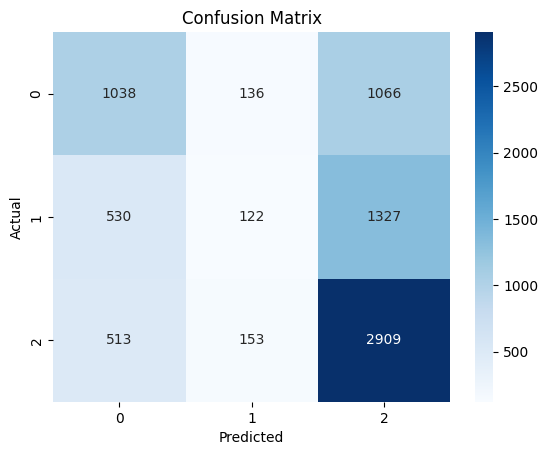

In [71]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [72]:
# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')

print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

F1 Score: 0.46462614976026523
Precision: 0.47038902116505715
Recall: 0.5220682576340775


## Checking Random Forest

In [73]:
# checking using randomforest
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

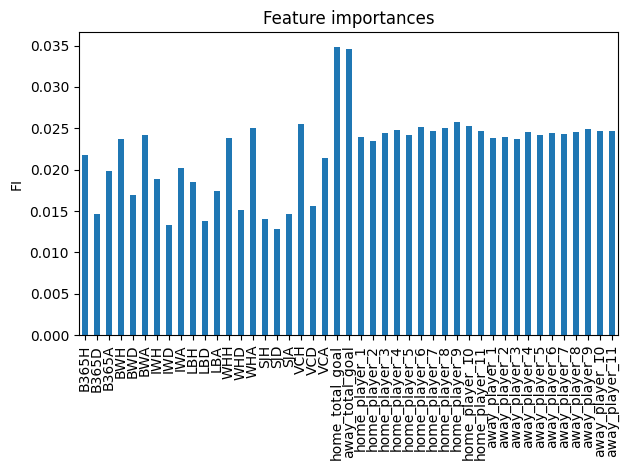

In [74]:
# plotting the important features from the input for better understanding
importances= rf.feature_importances_
forest_importances = pd.Series(importances, index=(match_df.drop(columns=['target'])).columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(forest_importances)
ax.set_title("Feature importances")
ax.set_ylabel("FI")
fig.tight_layout()

# Test

In [75]:
# cols_to_drop = ['id','match_api_id',
#                 'home_team_goal','away_team_goal',# removing it because we dont have this data for future matches
#                 'home_player_X1','home_player_X2','home_player_X3','home_player_X4','home_player_X5','home_player_X6','home_player_X7','home_player_X8','home_player_X9','home_player_X10','home_player_X11',
#                 'away_player_X1','away_player_X2','away_player_X3','away_player_X4','away_player_X5','away_player_X6','away_player_X7','away_player_X8','away_player_X9','away_player_X10','away_player_X11',
#                 'home_player_Y1','home_player_Y2','home_player_Y3','home_player_Y4','home_player_Y5','home_player_Y6','home_player_Y7','home_player_Y8','home_player_Y9','home_player_Y10','home_player_Y11',
#                 'away_player_Y1','away_player_Y2','away_player_Y3','away_player_Y4','away_player_Y5','away_player_Y6','away_player_Y7','away_player_Y8','away_player_Y9','away_player_Y10','away_player_Y11',
#                 'home_player_1','home_player_2','home_player_3','home_player_4','home_player_5','home_player_6','home_player_7','home_player_8','home_player_9','home_player_10','home_player_11',
#                 'away_player_1','away_player_2','away_player_3','away_player_4','away_player_5','away_player_6','away_player_7','away_player_8','away_player_9','away_player_10','away_player_11',
#                 'goal','shoton','shotoff','foulcommit','card','cross','corner','possession']
# # dropping columns
# df.drop(cols_to_drop, axis=1, inplace=True)

# dropping rows some irrelevant columns
# cols_to_drop = ['id','match_api_id','home_team_goal','away_team_goal','date','goal','shoton','shotoff','foulcommit','card','cross','corner','possession']
# df.drop(cols_to_drop, axis=1, inplace=True)

# # dropping rows with given percentage of null values
# threshold_percentage = 0.3
# def drop_rows(dfl, percentage):
#     k = ((dfl.isna().sum()/dfl.isna().count())<percentage)
#     k = k[k==True]
#     print("selected columns: \n", k.index)
#     return dfl[k.index]

# df = drop_rows(df, threshold_percentage)
# print(df.shape)

# checking distrimution of betting values
# df['B365A'].plot(kind='hist', bins=50, figsize=(10,5), title='B365A')

# trying to impute missing bet odd values with both of the same teams pervious matches values
# df['matchpair'] = df['home_team_api_id'].astype(str) + df['away_team_api_id'].astype(str)
# df[(df.isna()['B365D'] == False)&(df['matchpair']== '84269800')]
## not working

# # trying to impute missing bet odd values with mean of the corresponing teams pervious matches values
# home_team_cols = ['B365H','BWH','IWH','LBH','WHH','SJH','VCH','GBH','BSH']
# away_team_cols = ['B365A','BWA','IWA','LBA','WHA','SJA','VCA','GBA','BSA']
# draw_cols = ['B365D','BWD','IWD','LBD','WHD','SJD','VCD','GBD','BSD']
# df.groupby('home_team_api_id').mean()
# # [column_name][htapiid]